In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from seaborn import boxplot
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

import os 
os.environ['PATH']+=os.pathsep+'C:/Program Files/Graphviz/bin'

#data 불러오기
mushrooms = pd.read_csv("C:/Users/user/OneDrive/바탕 화면/data/mushrooms.csv")
df=pd.DataFrame(mushrooms)

#data 1000개만 고르기
df=df.sample(n=1000, random_state=1004) 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1363,e,f,s,w,f,n,f,w,b,p,...,f,w,w,p,w,o,e,n,s,g
5047,p,x,f,y,f,f,f,c,b,h,...,k,n,n,p,w,o,l,h,y,p
1341,e,f,f,n,f,n,f,w,b,h,...,s,w,w,p,w,o,e,n,a,g
7386,p,k,y,n,f,m,f,c,b,y,...,y,c,c,p,w,n,n,w,c,d
6592,p,f,y,e,f,s,f,c,n,b,...,k,w,w,p,w,o,e,w,v,d


In [3]:
df['class'].value_counts()

e    548
p    452
Name: class, dtype: int64

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1363 to 7672
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     1000 non-null   object
 1   cap-shape                 1000 non-null   object
 2   cap-surface               1000 non-null   object
 3   cap-color                 1000 non-null   object
 4   bruises                   1000 non-null   object
 5   odor                      1000 non-null   object
 6   gill-attachment           1000 non-null   object
 7   gill-spacing              1000 non-null   object
 8   gill-size                 1000 non-null   object
 9   gill-color                1000 non-null   object
 10  stalk-shape               1000 non-null   object
 11  stalk-root                1000 non-null   object
 12  stalk-surface-above-ring  1000 non-null   object
 13  stalk-surface-below-ring  1000 non-null   object
 14  stalk-color-above-rin

In [6]:
df=df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [7]:
#Preprocessing
label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

df = df.drop(["veil-type"], axis=1)

In [8]:
mushroom_target = df['class']
mushroom_preprocessed = df.drop(['class'],axis=1)
mushroom_preprocessed.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1363,1,1,7,0,5,1,1,0,7,1,...,2,0,7,7,2,1,0,3,3,1
5047,4,0,8,0,2,1,0,0,3,0,...,1,1,4,4,2,1,2,1,5,4
1341,1,0,4,0,5,1,1,0,3,1,...,0,2,7,7,2,1,0,3,0,1
7386,2,2,4,0,4,1,0,0,11,0,...,1,3,1,1,2,0,3,7,1,0
6592,1,2,2,0,7,1,0,1,0,1,...,1,1,7,7,2,1,0,7,4,0


In [9]:
#split test, train
x_train, x_test, y_train, y_test = train_test_split(mushroom_preprocessed,mushroom_target,random_state=42,test_size=0.2)

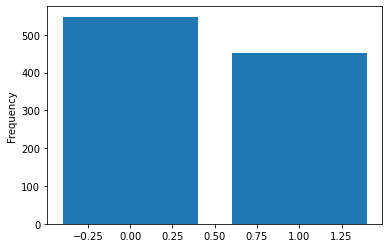

In [10]:
class_dist = mushroom_target.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

In [11]:
# KNN
for i in range(3, 12, 2):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    print(i)
    print("Accuracy:", round(metrics.accuracy_score(y_test,y_pred)*100,2), "%")

3
Accuracy: 97.5 %
5
Accuracy: 95.5 %
7
Accuracy: 93.5 %
9
Accuracy: 91.0 %
11
Accuracy: 90.5 %


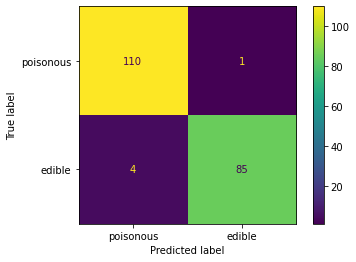

In [12]:
from sklearn.metrics import plot_confusion_matrix
label = ['poisonous','edible']

knn = KNeighborsClassifier(3)
knn.fit(x_train, y_train)

y_predict= knn.predict(x_test)

plot_confusion_matrix(knn,
                     x_test,y_test,
                     display_labels=label)
plt.show()

In [12]:
#DecisionTree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print("Accuracy: {}%".format(round(dt.score(x_test, y_test)*100,2)))

Accuracy: 99.5%


In [13]:
#DecisionTree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

print("Accuracy: {}%".format(round(dt.score(x_test, y_test)*100,2)))

Accuracy: 94.0%


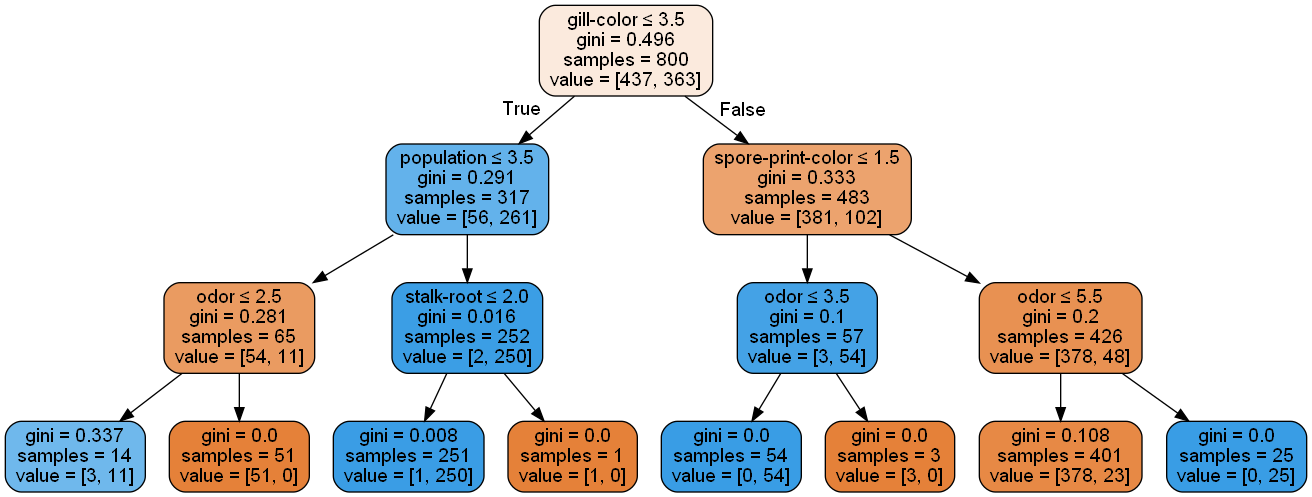

In [14]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=mushroom_preprocessed.columns,
                               filled=True, rounded=True, special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

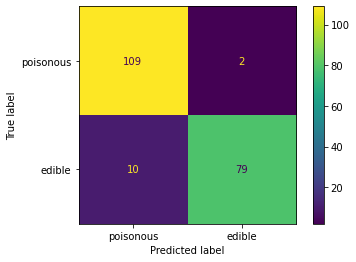

In [15]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  
from sklearn.metrics import ConfusionMatrixDisplay
label = ['poisonous','edible']

y_predict= dt.predict(x_test)
plot_confusion_matrix(dt,
                     x_test,y_test,
                     display_labels=label)
plt.show()

In [16]:
#LogisticRegression
lr= LogisticRegression(solver="liblinear")
lr.fit(x_train, y_train)
print("Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))

Accuracy: 91.5%


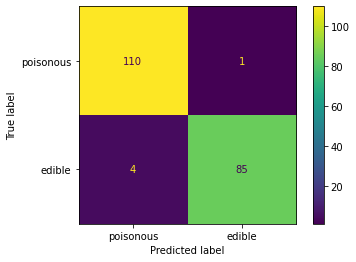

In [17]:
label = ['poisonous','edible']

y_predict= lr.predict(x_test)
plot_confusion_matrix(knn,
                     x_test,y_test,
                     display_labels=label)
plt.show()

In [18]:
#Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(x_train,y_train)

print('train set Accuracy : {}%'.format(round(gbc.score(x_train, y_train)*100,2)))

score_test = gbc.score(x_test, y_test)
print('일반화 Accuracy : {}%'.format(round(gbc.score(x_test, y_test)*100,2)))

train set Accuracy : 100.0%
일반화 Accuracy : 98.5%


In [19]:
#overfitting을 막기 위해 트리의 깊이를 줄여 pre-pruning실행
gbc = GradientBoostingClassifier(random_state=0, max_depth=1)

gbc.fit(x_train, y_train)

print('train set Accuracy : {}%'.format(round(gbc.score(x_train, y_train)*100,2)))

print('일반화 set Accuracy : {}%'.format(round(gbc.score(x_test, y_test)*100,2)))

train set Accuracy : 99.0%
일반화 set Accuracy : 97.0%


In [20]:
#learning_rate 조절하여 overfitting 해결
gbc = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01) # 기본값 0.1

gbc.fit(x_train, y_train)

print('train set Accuracy : {}%'.format(round(gbc.score(x_train, y_train)*100,2)))

print('일반화 set Accuracy : {}%'.format(round(gbc.score(x_test, y_test)*100,2)))

train set Accuracy : 98.38%
일반화 set Accuracy : 96.5%
